In [1]:
import pandas
import numpy
import scipy
from scipy import stats
from config import datadir

import matplotlib.pyplot as plot
%matplotlib inline

In [2]:
datadir / 'Drift Test ph and temp 06 12 2019 - 11'

WindowsPath('C:/Users/jarry/Google Drive/University/CSC411/CSC 2020 Webber J/Data/Drift Test ph and temp 06 12 2019 - 11')

# Test 1

In [11]:
skips1 = 0

In [12]:
test_1_data = pandas.read_csv(datadir / '20191206 pH Drift 1.txt', sep='	', header = None, 
                              usecols = [0, 1, 2, 3],
                              names = ["Date", "Time", "Temp", "pH"],
                              skiprows = skips1)

test_1_data = pandas.read_csv('Drift Test ph and temp 06 12 2019 - 09', sep='	', header = None, 
                              usecols = [0, 1, 2, 3],
                              names = ["Date", "Time", "Temp", "pH"],
                              skiprows = skips1)

In [13]:
test_1_data

,Date,Time,Temp,pH
0,2019/12/06,09:05:27 AM,23.663528,8.811172
1,2019/12/06,09:05:28 AM,23.728594,8.840874
2,2019/12/06,09:05:29 AM,23.745982,8.869581
3,2019/12/06,09:05:30 AM,23.771789,8.926380
4,2019/12/06,09:05:31 AM,23.800850,8.969278
...,...,...,...,...
441556,2019/12/11,11:47:56 AM,35.396296,15.749999
441557,2019/12/11,11:47:57 AM,35.396296,15.749999
441558,2019/12/11,11:47:58 AM,35.396119,15.749999
441559,2019/12/11,11:47:59 AM,35.396936,15.749999


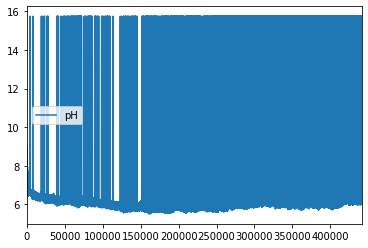

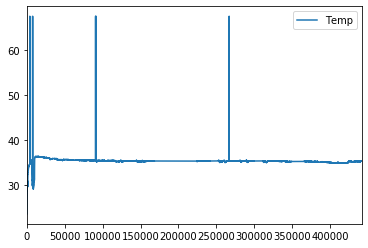

In [19]:
test_1_data.plot(y = "pH")
test_1_data.plot(y = "Temp")

In [20]:
z1 = numpy.abs(stats.zscore(test_1_data.pH))
print(z1, len(z1))

[0.51895301 0.52859393 0.53791189 ... 2.77121547 2.77121547 2.77121547] 441561


In [21]:
threshold = 1
print(numpy.where(z1 > threshold))

(array([  3927,   3928,   3929, ..., 441558, 441559, 441560], dtype=int64),)


In [22]:
test_1_data_trimmed = test_1_data[(z1 < threshold)]
test_1_data_trimmed

,Date,Time,Temp,pH
0,2019/12/06,09:05:27 AM,23.663528,8.811172
1,2019/12/06,09:05:28 AM,23.728594,8.840874
2,2019/12/06,09:05:29 AM,23.745982,8.869581
3,2019/12/06,09:05:30 AM,23.771789,8.926380
4,2019/12/06,09:05:31 AM,23.800850,8.969278
...,...,...,...,...
441537,2019/12/11,11:47:37 AM,35.395972,6.388283
441538,2019/12/11,11:47:38 AM,35.396218,6.476632
441539,2019/12/11,11:47:39 AM,35.396955,6.282884
441540,2019/12/11,11:47:40 AM,35.396326,6.272546


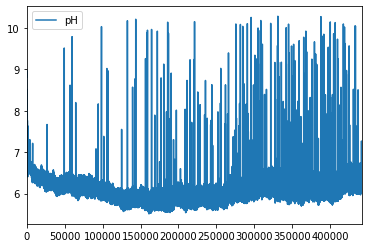

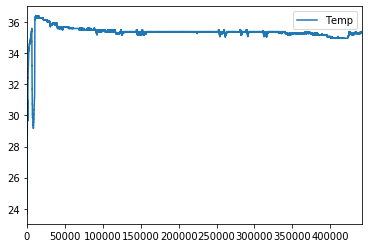

In [23]:
test_1_data_trimmed.plot(y = "pH")
test_1_data_trimmed.plot(y = "Temp")

In [24]:
rolling_window = 240

In [25]:
test_1_data_trimmed.pH

0         8.811172
1         8.840874
2         8.869581
3         8.926380
4         8.969278
            ...   
441537    6.388283
441538    6.476632
441539    6.282884
441540    6.272546
441541    6.463889
Name: pH, Length: 390820, dtype: float64

In [26]:
test_1_data_rolling = test_1_data_trimmed.rolling(rolling_window).mean().dropna()

In [27]:
test_1_data_rolling

,Temp,pH
239,25.579632,8.444710
240,25.593168,8.441596
241,25.606562,8.438066
242,25.620011,8.434281
243,25.633406,8.430283
...,...,...
441537,35.395430,6.347762
441538,35.395426,6.348333
441539,35.395430,6.348577
441540,35.395429,6.348011


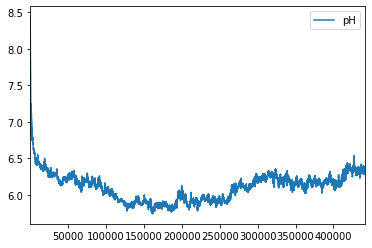

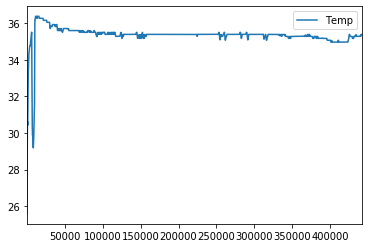

In [28]:
test_1_data_rolling.plot(y = "pH")
test_1_data_rolling.plot(y = "Temp")

In [29]:
x1 = numpy.arange(skips1,len(test_1_data_rolling.pH)+skips1)
order1 = 1

In [30]:
x1_extended = numpy.arange(skips1,len(test_1_data.pH)+10000+skips1)

In [31]:
test_1_ph_rolling_poly = numpy.poly1d(numpy.polyfit( x1, test_1_data_rolling.pH, order1))
print(test_1_ph_rolling_poly)

 
-5.501e-08 x + 6.116


In [32]:
fit_1_ph_poly = pandas.DataFrame(test_1_ph_rolling_poly(x1_extended))

In [33]:
test_1_ph_comp = pandas.concat([test_1_data_rolling.pH,fit_1_ph_poly], axis = 1)
test_1_ph_comp.columns = ["Experimental", "Polyfit"]

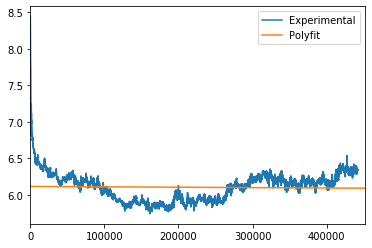

In [34]:
test_1_ph_comp.plot()

# Test 2

In [36]:
skips2 = skips1

In [38]:
test_2_data = pandas.read_csv(datadir/'20191211 pH Drift 2.txt', sep='	', header = None, 
                              usecols = [0, 1, 2, 3],
                              names = ["Date", "Time", "Temp", "pH"],
                              skiprows = skips2)

In [39]:
test_2_data

,Date,Time,Temp,pH
0,2019/12/11,12:13:30 PM,26.575789,5.660700
1,2019/12/11,12:13:31 PM,26.575219,5.660709
2,2019/12/11,12:13:32 PM,26.574864,5.665180
3,2019/12/11,12:13:33 PM,26.575445,5.665019
4,2019/12/11,12:13:34 PM,26.575622,5.665168
...,...,...,...,...
510515,2019/12/17,10:01:55 AM,34.938508,5.867898
510516,2019/12/17,10:01:56 AM,34.938173,5.863336
510517,2019/12/17,10:01:57 AM,34.938311,5.862251
510518,2019/12/17,10:01:58 AM,34.944763,5.862182


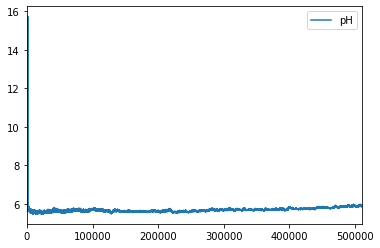

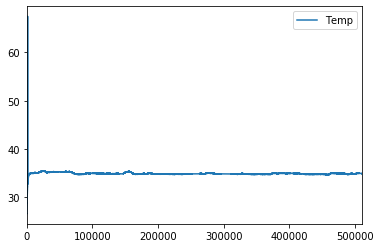

In [44]:
test_2_data.plot(y = "pH")
test_2_data.plot(y = "Temp")

In [45]:
x2 = numpy.arange(skips2,len(test_2_data.pH)+skips2)
order2 = 1

In [46]:
len(x2), len(test_2_data.pH)

(510520, 510520)

In [47]:
x2_extended = numpy.arange(skips2,len(test_2_data.pH)+10000+skips2)

In [48]:
test_2_ph_poly = numpy.poly1d(numpy.polyfit( x2, test_2_data.pH, order2))
print(test_2_ph_poly)

 
4.362e-07 x + 5.573


In [49]:
fit_2_ph_poly = pandas.DataFrame(test_2_ph_poly(x2_extended))

In [50]:
test_2_ph_comp = pandas.concat([test_2_data.pH,fit_2_ph_poly], axis = 1)
test_2_ph_comp.columns = ["Experimental", "Polyfit"]

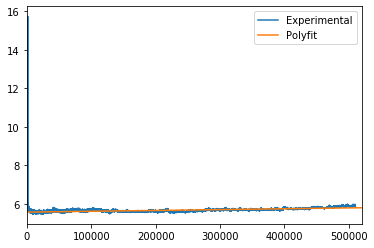

In [51]:
test_2_ph_comp.plot()

## Noise Reduction
Reduce noise via rolling average

In [52]:
rolling_window = 240

In [53]:
test_2_data_rolling = test_2_data.rolling(rolling_window).mean().pH.dropna()
test_2_data_rolling

239       5.674022
240       5.674064
241       5.674119
242       5.674166
243       5.674232
            ...   
510515    5.886351
510516    5.886226
510517    5.886108
510518    5.885990
510519    5.885871
Name: pH, Length: 510281, dtype: float64

In [54]:
test_2_ph_rolling_poly = numpy.poly1d(numpy.polyfit( x2[rolling_window-1:], test_2_data_rolling, order2))
print(test_2_ph_rolling_poly)

 
4.362e-07 x + 5.573


In [55]:
fit_2_ph_rolling_poly = pandas.DataFrame(test_2_ph_rolling_poly(x2_extended))

In [56]:
test_2_ph_comp_2 = pandas.concat([test_2_ph_comp, test_2_data_rolling, fit_2_ph_rolling_poly], axis = 1)
test_2_ph_comp_2.columns = ["Experimental", "Polyfit", "Moving Average","Fit after Noise Reduction"]

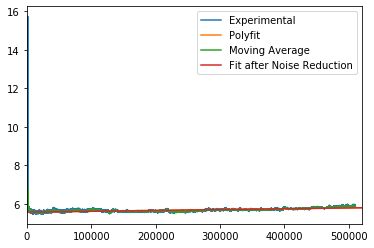

In [57]:
test_2_ph_comp_2.plot()

In [58]:
print(test_2_ph_rolling_poly)
print(test_2_ph_poly)

 
4.362e-07 x + 5.573
 
4.362e-07 x + 5.573


# Test 3

In [60]:
skips3 = skips2
Nrows = 290000-skips3

In [61]:
test_3_data = pandas.read_csv(datadir / '20191217 pH Drift 3.txt', sep='	', header = None, 
                              usecols = [0, 1, 2, 3],
                              names = ["Date", "Time", "Temp", "pH"], nrows = Nrows, skiprows = skips3)

In [62]:
test_3_data

,Date,Time,Temp,pH
0,2019/12/17,10:59:24 AM,18.548190,8.444315
1,2019/12/17,10:59:25 AM,18.547846,8.437364
2,2019/12/17,10:59:26 AM,18.548219,8.435781
3,2019/12/17,10:59:27 AM,18.548121,8.438819
4,2019/12/17,10:59:28 AM,18.548328,8.463300
...,...,...,...,...
289995,2019/12/20,07:32:45 PM,24.977649,7.296660
289996,2019/12/20,07:32:46 PM,24.977384,7.296749
289997,2019/12/20,07:32:47 PM,24.964864,7.296616
289998,2019/12/20,07:32:48 PM,24.964903,7.296442


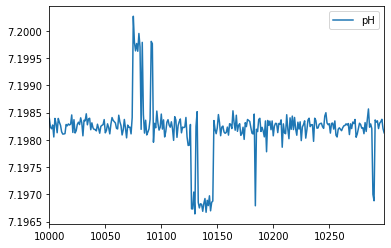

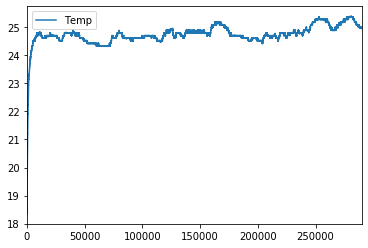

In [73]:
test_3_data[10000:10300].plot(y = "pH")
test_3_data.plot(y = "Temp")

In [64]:
x3 = numpy.arange(skips3,len(test_3_data.pH)+skips3)
order3 = 1

In [65]:
len(x3), len(test_3_data.pH)

(290000, 290000)

In [66]:
x3_extended = numpy.arange(skips3,len(test_3_data.pH)+10000+skips3)

In [67]:
test_3_ph_poly = numpy.poly1d(numpy.polyfit( x3, test_3_data.pH, order3))
print(test_3_ph_poly)

 
2.832e-07 x + 7.222


In [68]:
fit_3_ph_poly = pandas.DataFrame(test_3_ph_poly(x3_extended))

In [69]:
test_3_ph_comp = pandas.concat([test_3_data.pH,fit_3_ph_poly], axis = 1)
test_3_ph_comp.columns = ["Experimental", "Polyfit"]

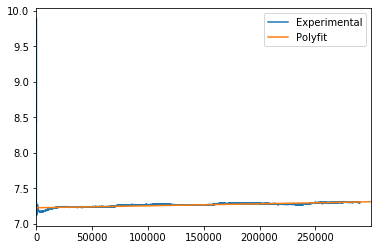

In [70]:
test_3_ph_comp.plot()

## Noise Reduction
Reduce noise via rolling average

In [ ]:
rolling_window = 240

In [ ]:
test_3_data_rolling = test_3_data.rolling(rolling_window).mean().pH.dropna()
test_3_data_rolling

In [ ]:
test_3_ph_rolling_poly = numpy.poly1d(numpy.polyfit( x3[rolling_window-1:], test_3_data_rolling, order3))
print(test_3_ph_rolling_poly)

In [ ]:
fit_3_ph_rolling_poly = pandas.DataFrame(test_3_ph_rolling_poly(x3_extended))

In [ ]:
test_3_ph_comp_2 = pandas.concat([test_3_ph_comp, test_3_data_rolling, fit_3_ph_rolling_poly], axis = 1)
test_3_ph_comp_2.columns = ["Experimental", "Polyfit", "Moving Average","Fit after Noise Reduction"]

In [ ]:
test_3_ph_comp_2.plot()

In [ ]:
print(test_3_ph_rolling_poly)
print(test_3_ph_poly)

# All Poly Comp

In [ ]:
print("Test 1", "\n",test_1_ph_rolling_poly, "\n", "\n")

print("Test 2", "\n",test_2_ph_poly)
print(test_2_ph_rolling_poly, "\n", "\n")

print("Test 3", "\n",test_3_ph_poly)
print(test_3_ph_rolling_poly, "\n", "\n")